# Explaining zero shot learning


see [Explaining transformer models using SHAP](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/blob/main/Chapter07/Explaining_Transformers.ipynb)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# add zero_shot_learning.pkz to path which includes a shap entry_point. See zero_shot_learning.yaml
# to create the zero_shot_learning.pkz run 'explainer export zero_shot_learning'
from explainer.explainers import zero_shot_learning

import transformers
print(f"Hugging Face transformer version used: {transformers.__version__}")
from transformers import AutoModelForSequenceClassification, AutoTokenizer, ZeroShotClassificationPipeline
from typing import Union, List

Hugging Face transformer version used: 4.20.1


In [2]:
# Loading the hugging face model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-3")
tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-3")

In [3]:
# Create a custom pipeline that only requires the text parameter 
# for the __call__ method and provides a method to set the labels
class ZeroShotModelPipeline(ZeroShotClassificationPipeline):
    # Overwrite the __call__ method
    def __call__(self, *args):
        out = super().__call__(args[0], self.set_labels)[0]

        return [[{"label":x[0], "score": x[1]}  for x in zip(out["labels"], out["scores"])]]

    def set_labels(self, labels: Union[str,List[str]]):
        self.set_labels = labels

In [4]:
text = ["I love playing cricket!"]
labels = ["insect","sports", "animal"]

In [5]:
# Assign the labels for the classification model
model.config.label2id.update({v:k for k,v in enumerate(labels)})
model.config.id2label.update({k:v for k,v in enumerate(labels)})


In [6]:
pipe = ZeroShotModelPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
pipe.set_labels(labels)

Shap version used: 0.40.0


  0%|          | 0/42 [00:00<?, ?it/s]

Partition explainer: 2it [00:18, 18.28s/it]               


Model predictions are: [[{'label': 'sports', 'score': 0.8340923190116882}, {'label': 'insect', 'score': 0.1633770763874054}, {'label': 'animal', 'score': 0.0025305552408099174}]]


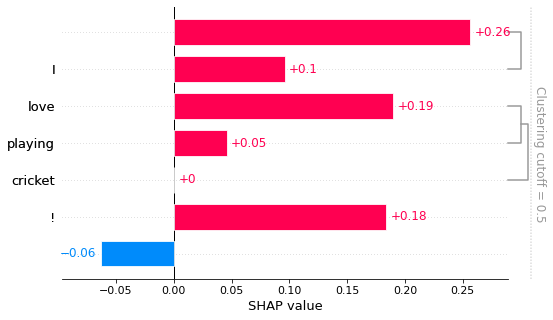

In [7]:
import entry_point
entry_point.entry_point(pipe, text)